<a href="https://colab.research.google.com/github/veronicaruiz404/SimMat/blob/main/Tarea_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [38]:
%matplotlib inline

In [34]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149
                 ])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

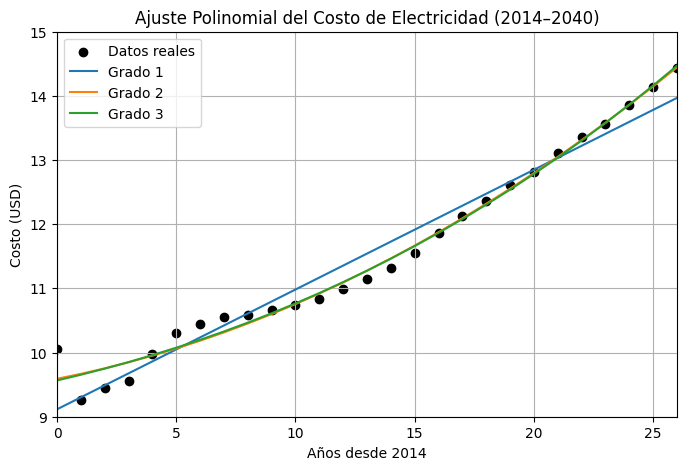

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='black', label='Datos reales')

for grado in [1, 2, 3]:
    coef = np.polyfit(x, y, grado)
    polinomio = np.poly1d(coef)
    plt.plot(x, polinomio(x), label=f'Grado {grado}')

plt.title('Ajuste Polinomial del Costo de Electricidad (2014–2040)')
plt.xlabel('Años desde 2014')
plt.ylabel('Costo (USD)')
plt.legend()
plt.grid(True)
plt.xlim(0, 26)
plt.ylim(9, 15)
plt.show()

# Forzar mostrar figura si no aparece
fig = plt.gcf()
fig.show()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ANÁLISIS CON NUMPY.POLYFIT
Polinomio grado 1 - MSE: 3214199.54
Coeficientes: [ 1.54397341e+03 -2.98661013e+06]

Polinomio grado 2 - MSE: 3196085.17
Coeficientes: [ 4.14771864e-01 -1.00597035e+02 -1.35658020e+06]

Polinomio grado 3 - MSE: 382430.95
Coeficientes: [-3.09229583e-01  1.83955772e+03 -3.64599955e+06  2.40770808e+09]



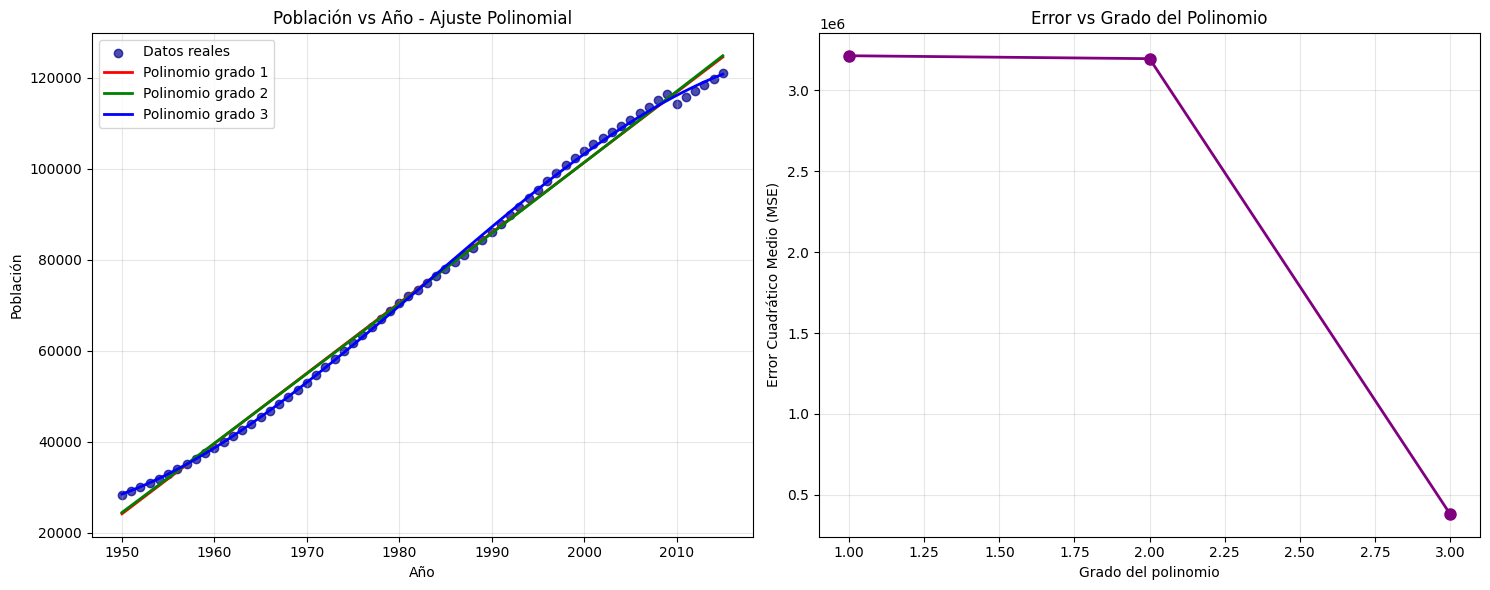

Polinomio grado 1 - MSE: 71786549429.03
Coeficientes: [ 2.19763698e+04 -4.12909290e+07]

Polinomio grado 2 - MSE: 7468500741.21
Coeficientes: [-7.81563303e+02  3.12087487e+06 -3.11279042e+09]

Polinomio grado 3 - MSE: 6693671496.43
Coeficientes: [-5.13155130e+00  2.97383380e+04 -5.73814784e+07  3.68647522e+10]



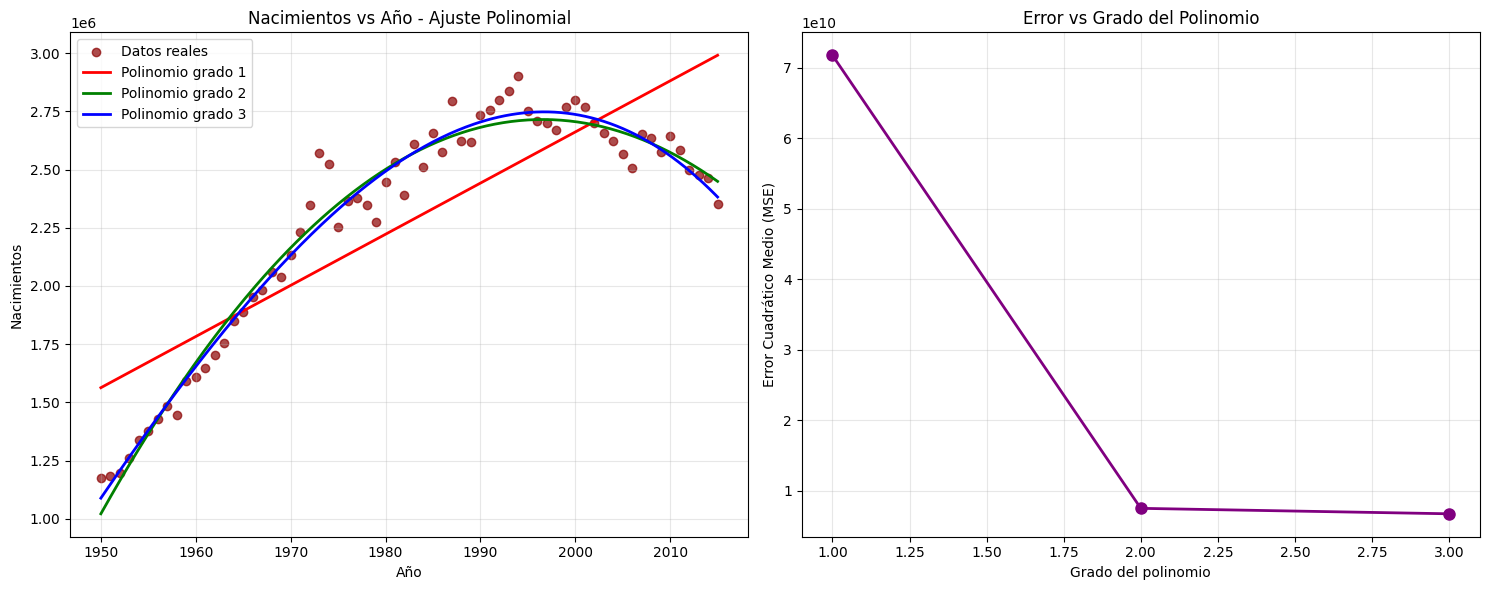

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ajustar_polinomios_numpy(X, y, titulo, color_datos):
    X_flat = X.flatten()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.scatter(X_flat, y, color=color_datos, alpha=0.7, label='Datos reales')

    grados = [1, 2, 3]
    colores = ['red', 'green', 'blue']
    errores = []

    X_smooth = np.linspace(X_flat.min(), X_flat.max(), 300)

    for i, grado in enumerate(grados):
        coeficientes = np.polyfit(X_flat, y, grado)
        polinomio = np.poly1d(coeficientes)

        y_pred = polinomio(X_flat)
        y_smooth_pred = polinomio(X_smooth)

        mse = np.mean((y - y_pred) ** 2)
        errores.append(mse)

        ax1.plot(X_smooth, y_smooth_pred, color=colores[i],
                linewidth=2, label=f'Polinomio grado {grado}')

        print(f"Polinomio grado {grado} - MSE: {mse:.2f}")
        print(f"Coeficientes: {coeficientes}\n")

    ax1.set_xlabel('Año')
    ax1.set_ylabel(titulo)
    ax1.set_title(f'{titulo} vs Año - Ajuste Polinomial')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(grados, errores, 'o-', color='purple', linewidth=2, markersize=8)
    ax2.set_xlabel('Grado del polinomio')
    ax2.set_ylabel('Error Cuadrático Medio (MSE)')
    ax2.set_title('Error vs Grado del Polinomio')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return errores

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/population_data.csv')
X = df.iloc[:, 0].values.reshape(-1, 1)
y_poblacion = df.iloc[:, 1].values
y_nacimientos = df.iloc[:, 2].values

print("ANÁLISIS CON NUMPY.POLYFIT")
errores_pob = ajustar_polinomios_numpy(X, y_poblacion, 'Población', 'darkblue')
errores_nac = ajustar_polinomios_numpy(X, y_nacimientos, 'Nacimientos', 'darkred')